# Load Libraries

In [2]:
import numpy as np 
import glob
import scipy.stats as st 
from datetime import date
from datetime import datetime
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import gsw
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import signal
import similaritymeasures
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset as netcdf
import time


# Load local routines

In [3]:
import mvp_routines as mvp

# Input from the user

In [1]:
Yorig = 1950

# Input MVP data directory and profile name (should contains all .m1 and .log files for the section)

profile_name = 'Stationary Profiling/Bathy 1'
mvpdir       = '../MVP300_DATA/' +profile_name + '/'


# Re-arange profiles into matrices

In [4]:
# Loop on MVP .m1 and log files in the directory

list_of_mvp_files = sorted(filter(os.path.isfile,\
                           glob.glob(mvpdir + '*.m1')))



PRES_temp = []
TIME_temp = []
COND_temp = []
SALT_temp = []
TEMP_temp = []
DIR = []
for mvp_dat_name in list_of_mvp_files[0:]:

    mvp_log_name=mvp_dat_name[:-3]+'.log'
    # mvp_log_name=mvpdir+'MVP_'+mvp_dat_name[-20:-3]+'.log'

    # Get start and end time of the cycle

    (mvp_tstart,mvp_tend,cycle_dur) = mvp.get_log(mvp_log_name,Yorig)
    if cycle_dur>1:

        # Read one cycle MVP data
        (pres,cond,salt,temp) = mvp.read_mvp_cycle(mvp_dat_name)
        
        if np.nanmax(pres)-np.nanmin(pres)>2:

            # Allocate time to samples and select the ascending part 
            (pres_up,cond_up,salt_up,temp_up,time_up) = mvp.time_mvp_cycle_up(pres,cond,salt,temp,mvp_tstart,mvp_tend)
            (pres_down,cond_down,salt_down,temp_down,time_down) = mvp.time_mvp_cycle_down(pres,cond,salt,temp,mvp_tstart,mvp_tend)


            if len(pres_down)>0:
                if np.nanmax(pres_down)-np.nanmin(pres_down)>2:
                    PRES_temp.append(pres_down)
                    TIME_temp.append(time_down)
                    COND_temp.append(cond_down)
                    SALT_temp.append(salt_down)
                    TEMP_temp.append(temp_down)
                    DIR.append('down')

                    
            if len(pres_up)>0:
                if np.nanmax(pres_up)-np.nanmin(pres_up)>2:
                    PRES_temp.append(pres_up)
                    TIME_temp.append(time_up)
                    COND_temp.append(cond_up)
                    SALT_temp.append(salt_up)
                    TEMP_temp.append(temp_up)
                    DIR.append('up')

            
            

# Re-arange files into matrices
M_size = 0
for i in range(len(PRES_temp)):
    M_size = max(M_size, len(PRES_temp[i]))
    
PRES = np.zeros(( len(PRES_temp), M_size))
COND = np.zeros(( len(PRES_temp), M_size))
SALT = np.zeros(( len(PRES_temp), M_size))
TEMP = np.zeros(( len(PRES_temp), M_size))
TIME = np.zeros(( len(PRES_temp), M_size))
PRES[:] = np.nan
COND[:] = np.nan
SALT[:] = np.nan
TEMP[:] = np.nan
TIME[:] = np.nan

del M_size

for i in range(len(PRES_temp)):
    PRES[i,0:len(PRES_temp[i])] = PRES_temp[i]
    COND[i,0:len(PRES_temp[i])] = COND_temp[i]
    SALT[i,0:len(PRES_temp[i])] = SALT_temp[i]
    TEMP[i,0:len(PRES_temp[i])] = TEMP_temp[i]
    TIME[i,0:len(PRES_temp[i])] = TIME_temp[i]
del PRES_temp, TEMP_temp, TIME_temp, COND_temp, SALT_temp


In [6]:
print(len(PRES), 'MVP profiles found')

0 MVP profiles found


# Plot profiles

In [5]:
plt.figure(1)
plt.plot(TEMP[0],PRES[0],label='up')
plt.plot(TEMP[1],PRES[1],label='down')
plt.gca().invert_yaxis()
plt.title('Temperature profile')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(2)
plt.plot(COND[0],PRES[0],label='up')
plt.plot(COND[1],PRES[1],label='down')
plt.gca().invert_yaxis()
plt.title('Conductivity profile') 
plt.xlabel('Conductivity (S/m)')  
plt.ylabel('Pressure (dbar)')
plt.legend()

plt.figure(3)
plt.plot(SALT[0],PRES[0],label='up')
plt.plot(SALT[1],PRES[1],label='down')
plt.gca().invert_yaxis()
plt.title('Salinity profile')
plt.xlabel('Salinity (psu)')
plt.ylabel('Pressure (dbar)')
plt.legend()



IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 640x480 with 0 Axes>

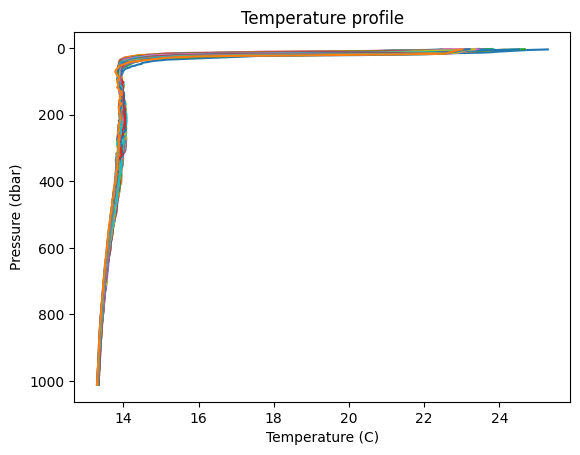

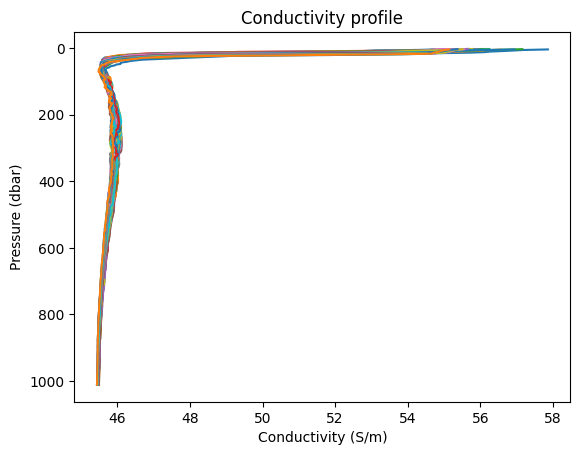

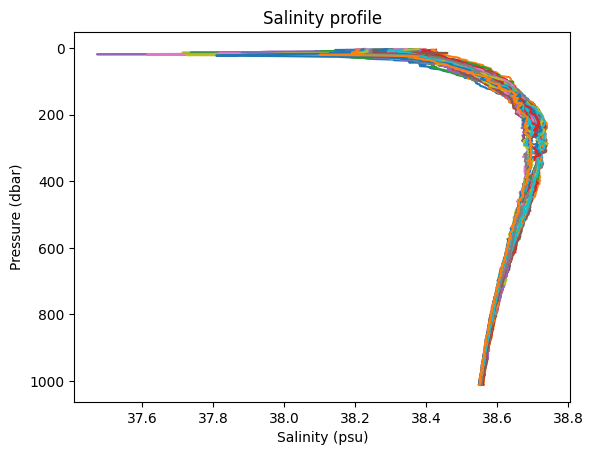

In [ ]:
plt.figure(1)
for i in range(0,len(TEMP)):
    plt.plot(TEMP[i],PRES[i])
plt.title('Temperature profile')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.gca().invert_yaxis()

plt.figure(2)
for i in range(0,len(TEMP)):
    plt.plot(COND[i],PRES[i])
plt.title('Conductivity profile') 
plt.xlabel('Conductivity (S/cm)')  
plt.ylabel('Pressure (dbar)')
plt.gca().invert_yaxis()


plt.figure(3)
for i in range(0,len(TEMP)):
    plt.plot(SALT[i],PRES[i])
plt.title('Salinity profile')
plt.xlabel('Salinity (psu)')
plt.ylabel('Pressure (dbar)')
plt.gca().invert_yaxis()


